In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + '/Colab Notebooks/DS_takeHomeTask/conversion rate/'

Mounted at /content/gdrive


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv(base_dir+'conversion_data.csv')

In [5]:
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [6]:
df['country'] = df['country'].astype('category')
df['source'] = df['source'].astype('category')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   country              316200 non-null  category
 1   age                  316200 non-null  int64   
 2   new_user             316200 non-null  int64   
 3   source               316200 non-null  category
 4   total_pages_visited  316200 non-null  int64   
 5   converted            316200 non-null  int64   
dtypes: category(2), int64(4)
memory usage: 10.3 MB


In [8]:
df.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


the max age is 123, but the 75% age is only 36

In [16]:
sorted(df['age'],reverse=True)[:10]

[123, 111, 79, 77, 73, 72, 70, 70, 69, 69]

123, 111 are unrealistic ages, so lets remove them

In [17]:
print(df.loc[df['age']==123])
print(df.loc[df['age']==111])

       country  age  new_user source  total_pages_visited  converted
90928  Germany  123         0    Seo                   15          1
       country  age  new_user source  total_pages_visited  converted
295581      UK  111         0    Ads                   10          1


In [18]:
df.drop([90928,295581],inplace=True)

the mean for conversion rate is 0.03, which means the average conversion rate is 3%

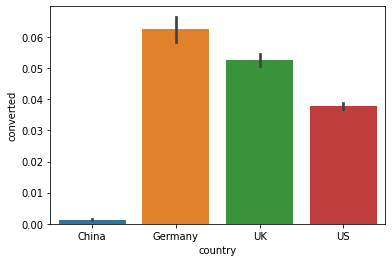

In [20]:
sns.barplot(x='country',y='converted',data=df)

China has a significantly lower conversion rate than other countries

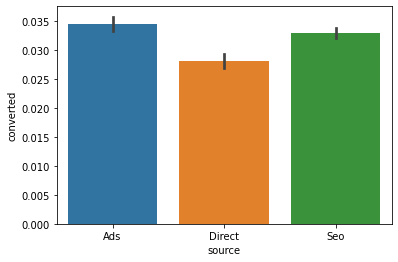

In [22]:
sns.barplot(x='source',y='converted',data=df)

Most conversion comes from Ads, followed by SEO and then Direct Source

In [38]:
data_pages = df.groupby('total_pages_visited')[['converted']].mean()

In [39]:
data_pages.head()

,converted
total_pages_visited,
1,0.000000
2,0.000228
3,0.000251
4,0.000780
5,0.001570


In [32]:
data_ages = df.groupby('age')[['converted']].mean()

In [33]:
data_ages.head()

,converted
age,
17,0.071607
18,0.066029
19,0.058616
20,0.057109
21,0.053985


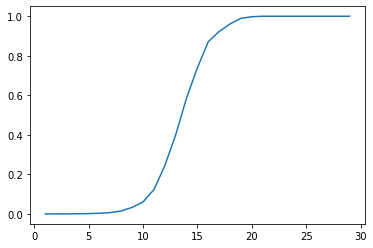

In [40]:
plt.plot(data_pages.index,data_pages['converted'])

the plot show a jump in conversion rate as visited pages increase and more than 15

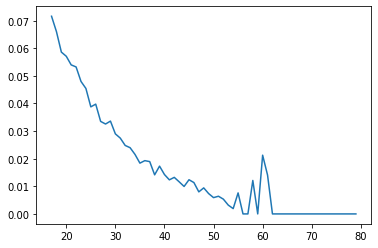

In [42]:
plt.plot(data_ages.index, data_ages['converted'])

as age increase, the conversion rate decrease

In [44]:
df_country = pd.get_dummies(df['country'])
df = pd.concat([df,df_country],axis=1)
df_source = pd.get_dummies(df['source'])
df = pd.concat([df,df_source],axis=1)
df.head()

,country,age,new_user,source,total_pages_visited,converted,China,Germany,UK,US,Ads,Direct,Seo
0,UK,25,1,Ads,1,0,0,0,1,0,1,0,0
1,US,23,1,Seo,5,0,0,0,0,1,0,0,1
2,US,28,1,Seo,4,0,0,0,0,1,0,0,1
3,China,39,1,Seo,5,0,1,0,0,0,0,0,1
4,US,30,1,Seo,6,0,0,0,0,1,0,0,1


In [64]:
X_train, X_test, y_train, y_test = train_test_split(df[['total_pages_visited','China','Germany','UK','US','Ads','Direct','Seo','age','new_user']],df['converted'],test_size=0.33,random_state=42)

In [65]:

from sklearn.ensemble import RandomForestClassifier

In [66]:
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train, np.array(y_train))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [67]:
forest.score(X_test,y_test)

0.9850209878672876

the accuracy on test set is 98%

In [70]:
1-sum(df['converted']/len(df['converted']))

0.9677480565974502

baseline accuracy is 96%

In [71]:
importances = forest.feature_importances_

In [75]:
std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)

In [77]:
indices = np.argsort(importances)[::-1]

In [90]:
print('Feature ranking:')
for f in range(X_train.shape[1]):
  print("%d. feature %d (%f)"%(f+1,indices[f],importances[indices[f]]))

Feature ranking:
1. feature 0 (0.798620)
2. feature 8 (0.121744)
3. feature 9 (0.036672)
4. feature 1 (0.022645)
5. feature 3 (0.004356)
6. feature 4 (0.004055)
7. feature 7 (0.003187)
8. feature 6 (0.003037)
9. feature 5 (0.002966)
10. feature 2 (0.002719)


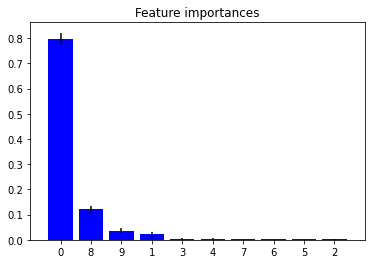

In [98]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]),importances[indices],color="b",yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]),indices)
plt.xlim([-1,X_train.shape[1]])
plt.show()

the most important feature is total visited pages, however, people with more interests will visite more pages. The significant effect can be caused by the intention of purchase, instead of causing a purchase.

Now, lets remove total_visited_pages 

In [99]:
X_train, X_test, y_train, y_test = train_test_split(df[['China','Germany','UK','US','Ads','Direct','Seo','age','new_user']], df['converted'], test_size=0.33, random_state=42)

In [100]:
forest = RandomForestClassifier(random_state=42,class_weight={0: 0.7, 1: 0.3})
forest.fit(X_train, np.array(y_train))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.7, 1: 0.3}, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

In [101]:
forest.score(X_test,y_test)

0.9682115270350564

the accuracy on test set is similar to baseline accuracy

Feature ranking:
1. feature 8 (0.406005)
2. feature 7 (0.352736)
3. feature 0 (0.136177)
4. feature 3 (0.033812)
5. feature 2 (0.029804)
6. feature 1 (0.021183)
7. feature 5 (0.007869)
8. feature 4 (0.007102)
9. feature 6 (0.005312)


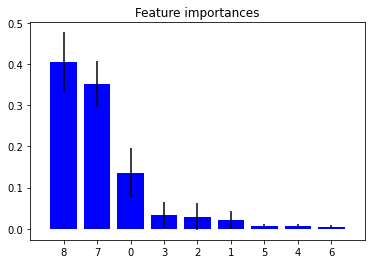

In [104]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="b", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

after removing total_pages_visited the most important feature is whether its new user or not

In [105]:
from sklearn import tree

In [106]:
clf = tree.DecisionTreeClassifier(max_depth=3, class_weight={0:0.7,1:0.3})

In [108]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 0.7, 1: 0.3},
                       criterion='gini', max_depth=3, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')

In [111]:
tree.export_graphviz(clf,out_file=base_dir+"tree.dot")

In [112]:
from io import StringIO
import pydotplus
from IPython.display import Image

In [113]:
out = StringIO()

In [118]:
tree.export_graphviz(clf,out_file=out, feature_names=["China","Germany","UK","US","Ads","Direct","Seo","age","new_user"],class_names=['converted'])

In [116]:
graph=pydotplus.graph_from_dot_data(out.getvalue())

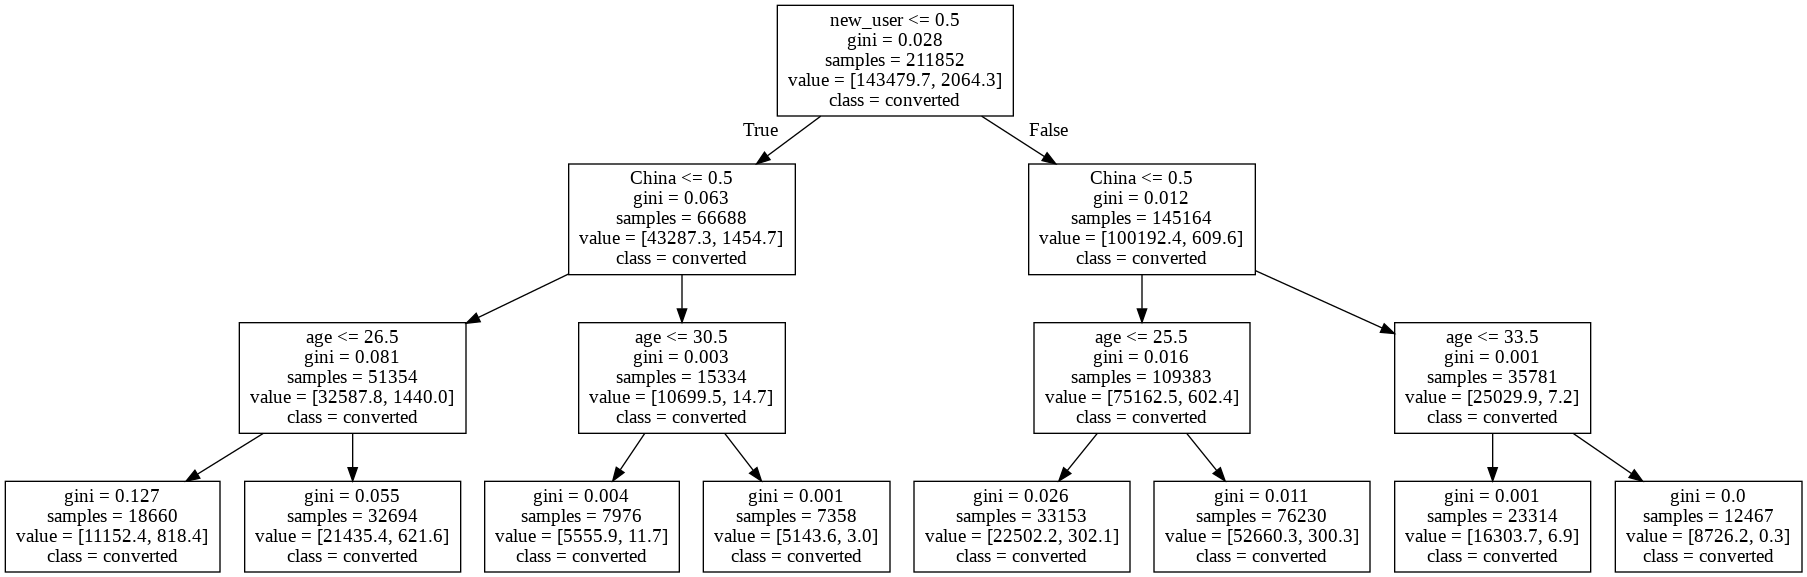

In [117]:
Image(graph.create_png())


The first split of the decision tree is whether or not it is a new user. Thus, the site should try to incentivize older users to come back. The next split of the tree is on country, and the tree is split on the user not being from China. Since China has a large population, the site should try to increase the number of Chinese visitors. The third level is split on age. Basically, the site works better for young users (less than about 30 years of age). Thus, the site should advertise towards young people to maximize the conversion rate of their target audience.